In [3]:
import pandas as pd

In [4]:
df_train=pd.read_csv('../../Datasets/house_price/train.csv',)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train1=pd.read_csv('../../Datasets/house_price/train.csv',keep_default_na=False,)
#read_csv khudka dimag nahi lagayega jb ham keep_default_na=True


In [5]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [7]:
all_col=list(df_train1.columns)
all_col.remove('SalePrice')
lc=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [8]:
type_dict={}

for i in all_col:
    if i in lc:
        type_dict[i]=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a','nan', 'null']
    else:
        type_dict[i]=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null']
        

In [9]:
df_train1=pd.read_csv('../../Datasets/house_price/train.csv',keep_default_na=False,na_values=type_dict)
df_test=pd.read_csv('../../Datasets/house_price/test.csv',keep_default_na=False,na_values=type_dict)

In [10]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
sum(df_train1.isna().sum()>0)

5

In [12]:
sum(df_test.isna().sum()>0)

19

In [13]:
categorical_col=list(df_train1.select_dtypes(include='object').columns)
numeric_col=list(df_train1.select_dtypes(exclude='object').columns)
numeric_col.remove('Id')
numeric_col.remove('SalePrice')

# Feature Engineering

## 0.'Handle Outliers'

#### 1.Detection using Histogram

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

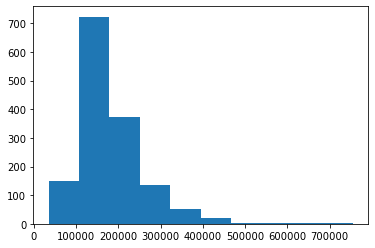

In [14]:
import matplotlib.pyplot as plt
plt.hist(df_train1['SalePrice'])

In [15]:
df_train1['SalePrice'].describe()

# Persentile is rank 
# 25%,50%,75%  25%=129975.00 means there are 25% house prices less than 129975
# this percentile is Quertiles

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [16]:
df_train1['SalePrice'].median()

163000.0

#### 2.BoxPlot Method for Find Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x249d40085e0>,
 'caps': [<matplotlib.lines.Line2D at 0x249d4008ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249d4008280>],
 'medians': [<matplotlib.lines.Line2D at 0x249d40163a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249d4016700>],
 'means': []}

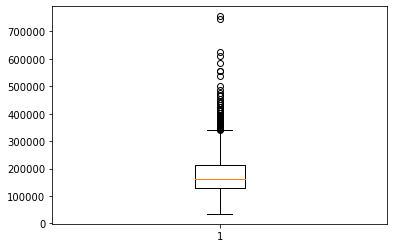

In [17]:
plt.boxplot(df_train1['SalePrice'])
#Boxplot give threshold 

#### 3.Z-Score

In [18]:
# Manually
z_score=(df_train1['SalePrice']-df_train1['SalePrice'].mean())/df_train1['SalePrice'].std()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
z1=scaler.fit_transform(df_train1[['SalePrice']])

In [19]:
z1,z_score

(array([[ 0.34727322],
        [ 0.00728832],
        [ 0.53615372],
        ...,
        [ 1.07761115],
        [-0.48852299],
        [-0.42084081]]),
 0       0.347154
 1       0.007286
 2       0.535970
 3      -0.515105
 4       0.869545
           ...   
 1455   -0.074534
 1456    0.366036
 1457    1.077242
 1458   -0.488356
 1459   -0.420697
 Name: SalePrice, Length: 1460, dtype: float64)

In [20]:
# Outliers which are
out_l=((z_score>3)|(z_score<=-3))
df_train1[out_l]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NA,IR2,HLS,AllPub,...,0,NA,NA,NA,0,10,2006,New,Partial,438780
178,179,20,RL,63.0,17423,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NA,IR2,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2006,WD,Normal,475000
349,350,60,RL,56.0,20431,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2009,WD,Normal,555000
473,474,20,RL,110.0,14977,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2007,New,Partial,440000
496,497,20,RL,NaN,12692,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,430000
527,528,60,RL,67.0,14948,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,6,2009,ConLI,Normal,451950


In [21]:
df_train1[~((z_score>3)|(z_score<=-3))][numeric_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [22]:
df_train1[df_train['SalePrice']>340000]['Id']

11        12
53        54
58        59
112      113
151      152
        ... 
1268    1269
1353    1354
1373    1374
1388    1389
1437    1438
Name: Id, Length: 61, dtype: int64

In [23]:
df_train1['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [24]:
# df_train.drop(df_train['Id']==df_train[df_train['SalePrice']>340000]['Id'],inplace=True,errors='ignore')

## 1.Missing Data

In [25]:
#Numeric -> Median
#Categorical-> mode

from sklearn.impute import SimpleImputer

In [26]:
imputer_num=SimpleImputer(strategy='median') # we need to pass strategy 
imputer_num.fit(df_train1[numeric_col])  #it only find median of every numeric colums
df_train1[numeric_col]=imputer_num.transform(df_train1[numeric_col]) # it return numpy array /it fills missing data by respective cols median values
df_test[numeric_col]=imputer_num.transform(df_test[numeric_col])

In [27]:
imputer_cat=SimpleImputer(strategy='most_frequent') # we need to pass strategy 
imputer_cat.fit(df_train1[categorical_col])  #it only find median of every numeric colums
df_train1[categorical_col]=imputer_cat.transform(df_train1[categorical_col]) # it return numpy array /it fills missing data by respective cols median values
df_test[categorical_col]=imputer_cat.transform(df_test[categorical_col])

In [28]:
df_train1.isna().sum().sum(),df_test.isna().sum().sum()

(0, 0)

## 2.Feature Encoding

In [29]:
#Categorical Columns
len(categorical_col)

43

In [29]:
df_train1[categorical_col].nunique().sum() #find how many columns newly created after onehot encoding

266

In [31]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')#sparse gives sparse metrix
#handle_unknown='ignore' =if in training data there is 3 categories present and in testing if 
# any unknown chategories present at that time it ignore that categories if we assign "error" then if unknown category present then it give error 

ohe.fit(df_train1[categorical_col]) # finds unique categories from every column
# ohe.get_feature_names() #return newly created cols names


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [33]:
df_train1[ohe.get_feature_names()] = ohe.transform(df_train1[categorical_col]) #return numpy array

In [34]:
df_train1.shape

(1460, 347)

In [35]:
df_test[ohe.get_feature_names()]=ohe.transform(df_test[categorical_col])

In [36]:
df_test[categorical_col].nunique().sum() # for find unkown categories

248

In [37]:
df_train1.shape,df_test.shape

((1460, 347), (1459, 346))

## 3.Feature Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train1[numeric_col])

MinMaxScaler()

In [39]:
df_train1[numeric_col] = scaler.transform(df_train1[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

In [40]:
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,1,0.235294,RL,0.150685,0.033420,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.000000,RL,0.202055,0.038795,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.235294,RL,0.160959,0.046507,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,0.294118,RL,0.133562,0.038561,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.235294,RL,0.215753,0.060576,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4.Feature Selection / Feature Reduction

In [41]:
# In feature Selection we use existing columns
# In Feature Reduction we need to Genrate new Columns
# 80=>15 Columns and it contains much of the info/variance

#For Feature Selection we use Principle  Component Analysis(PCA)

In [41]:
sel_col=df_train1.corr().columns[abs(df_train1.corr()['SalePrice'])>0.1 ] 


In [54]:
df_train1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
Id,1.000000,-2.208463e-03,-8.610938e-05,7.297010e-03,-7.812326e-03,-1.882017e-02,-7.775771e-03,-1.930846e-02,-3.014926e-02,-1.322708e-02,...,-0.025508,0.009070,0.038140,-0.045378,-0.002148,-0.003206,-0.009769,-0.060852,-0.025711,-0.001779
MSSubClass,-0.002208,1.000000e+00,-1.489536e-16,-2.241748e-16,-8.683884e-17,-6.971064e-17,1.736189e-16,4.037110e-17,4.025837e-17,2.478797e-17,...,0.044564,0.028704,-0.156656,0.012965,-0.276075,0.083482,0.014607,-0.141478,0.072270,-0.198293
LotFrontage,-0.000086,-1.489536e-16,1.000000e+00,-2.322718e-16,1.306542e-16,2.915096e-17,-1.777206e-16,-2.342136e-16,-1.113621e-16,-8.290714e-17,...,-0.070496,0.103595,-0.069444,-0.205883,-0.015868,0.102193,0.062271,-0.223794,-0.108308,-0.075443
LotArea,0.007297,-2.241748e-16,-2.322718e-16,1.000000e+00,1.989738e-16,2.417653e-16,-4.608674e-16,8.509606e-17,-1.670281e-16,5.938633e-17,...,-0.052777,0.086192,0.000601,0.081049,-0.017969,0.000515,0.116574,0.041167,0.118272,-0.086203
OverallQual,-0.007812,-8.683884e-17,1.306542e-16,1.989738e-16,1.000000e+00,1.442328e-16,1.211500e-17,6.333430e-17,2.135087e-16,3.952440e-17,...,0.047120,-0.067668,0.003173,0.127944,-0.040261,-0.052619,0.136317,0.056800,0.042502,0.000414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x42_AdjLand,-0.003206,8.348188e-02,1.021932e-01,5.147743e-04,-5.261874e-02,-1.495560e-01,-3.000145e-01,6.083622e-02,3.174206e-02,8.387007e-02,...,-0.072779,0.007858,0.099027,-0.147191,-0.307429,1.000000,-0.020686,0.082926,-0.201996,0.010735
x42_Alloca,-0.009769,1.460746e-02,6.227117e-02,1.165738e-01,1.363167e-01,-1.494590e-01,8.300668e-02,1.227916e-01,-6.062571e-02,-6.829355e-02,...,0.022074,0.023730,0.119621,0.079161,-0.018847,-0.020686,1.000000,0.123658,-0.227668,-0.163693
x42_Family,-0.060852,-1.414784e-01,-2.237939e-01,4.116749e-02,5.680005e-02,-4.029593e-01,-1.238068e-02,1.413260e-01,2.970919e-01,1.117113e-01,...,-0.247404,0.058710,-0.001744,0.230937,-0.231455,0.082926,0.123658,1.000000,0.215667,0.042279
x42_Normal,-0.025711,7.227013e-02,-1.083075e-01,1.182723e-01,4.250167e-02,-1.092531e-01,-3.362760e-02,1.876420e-01,5.898728e-03,-7.884709e-02,...,-0.163203,-0.113846,-0.074398,0.280117,-0.049210,-0.201996,-0.227668,0.215667,1.000000,-0.012966


In [43]:
df_train1[numeric_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [44]:
from sklearn.decomposition import PCA

In [55]:
selected_cols=numeric_col+list(ohe.get_feature_names())
pca=PCA()
pca.fit(df_train1[selected_cols])
df_train1[selected_cols]=pca.transform(df_train1[selected_cols])
df_test[selected_cols]=pca.fit_transform(df_test[selected_cols])


In [56]:
pca.components_

array([[-1.19106274e-06, -3.80872938e-07,  3.55285431e-06, ...,
        -1.04592027e-24, -3.00947240e-24, -2.69136741e-23],
       [ 9.99638667e-01, -3.28154490e-03,  2.57812521e-02, ...,
        -3.58253980e-21, -1.03081993e-20, -9.21860977e-20],
       [ 2.29397197e-03,  9.99299564e-01,  3.70766819e-02, ...,
        -1.34460331e-21, -3.86888622e-21, -3.45994011e-20],
       ...,
       [-0.00000000e+00, -9.19406527e-34, -6.01754038e-33, ...,
         5.58487559e-01, -2.30327031e-01, -3.83191742e-14],
       [ 0.00000000e+00,  6.21558756e-33, -2.54180132e-32, ...,
         5.52791991e-01,  6.06954339e-01, -8.12960810e-14],
       [-0.00000000e+00, -2.36090122e-30,  1.92320957e-30, ...,
         1.03000840e-02,  2.96368847e-02,  2.65042289e-01]])

In [47]:
df_train1.shape

(1460, 347)

## 5.Model Bulding => Regression

In [49]:
selected_cols=numeric_col+list(ohe.get_feature_names())
len(selected_cols)

302

In [62]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(df_train1[selected_cols],df_train1['SalePrice'])
model_rf.score(df_train1[selected_cols],df_train1['SalePrice'])

0.8847601201117247

## 6.Make Prediction & submit

In [59]:
yp=model_rf.predict(df_test[sel_col])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_rf1.csv',index=False)

DecisionTreeRegressor()

In [61]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(df_train[sel_col],df_train['SalePrice'])
model_lr.score(df_train[sel_col],df_train['SalePrice'])

KeyError: "['x8_NridgHt', 'x37_Y', 'x9_Artery', 'x8_NoRidge', 'x14_CompShg', 'x28_Y', 'x13_Gable', 'x23_Av', 'x17_Stone', 'x18_TA', 'x25_NA', 'x8_OldTown', 'x21_TA', 'x15_MetalSd', 'x22_TA', 'x38_Ex', 'x22_Fa', 'x21_Ex', 'x41_WD', 'x8_IDOTRR', 'x2_Grvl', 'x27_Gd', 'x0_RL', 'x14_WdShngl', 'x24_NA', 'x42_Abnorml', 'x3_Reg', 'x12_2Story', 'x23_No', 'x11_Duplex', 'x25_Unf', 'x19_Fa', 'x4_HLS', 'x15_CemntBd', 'x30_Gd', 'x27_Fa', 'x36_NA', 'x27_TA', 'x0_C (all)', 'x16_CmentBd', 'x8_NAmes', 'x32_TA', 'x33_NA', 'x24_GLQ', 'x29_SBrkr', 'x22_NA', 'x17_None', 'x2_NA', 'x19_TA', 'x11_1Fam', 'x15_Wd Sdng', 'x35_Fa', 'x39_NA', 'x34_Unf', 'x23_Gd', 'x21_NA', 'x21_Fa', 'x8_Sawyer', 'x9_Feedr', 'x18_Fa', 'x24_Rec', 'x16_Wd Sdng', 'x8_Edwards', 'x20_CBlock', 'x30_Fa', 'x29_FuseF', 'x12_1.5Fin', 'x8_MeadowV', 'x8_Timber', 'x3_IR2', 'x27_Ex', 'x16_MetalSd', 'x36_Fa', 'x9_Norm', 'x20_PConc', 'x18_Gd', 'x34_NA', 'x34_RFn', 'x8_BrkSide', 'x16_VinylSd', 'x21_Gd', 'x28_N', 'x24_BLQ', 'x15_AsbShng', 'x30_TA', 'x42_Normal', 'x33_Attchd', 'x32_Ex', 'x33_Detchd', 'x32_Gd', 'x8_StoneBr', 'x32_NA', 'x39_MnPrv', 'x41_New', 'x35_NA', 'x15_VinylSd', 'x29_FuseA', 'x33_BuiltIn', 'x18_Ex', 'x13_Hip', 'x35_TA', 'x42_Partial', 'x0_RM', 'x34_Fin', 'x4_Bnk', 'x37_N', 'x8_Somerst', 'x17_BrkFace', 'x6_CulDSac', 'x24_ALQ', 'x20_Slab', 'x3_IR1', 'x20_BrkTil', 'x31_Typ', 'x36_TA', 'x23_NA', 'x30_Ex', 'x39_GdWo', 'x8_BrDale'] not in index"

In [46]:
yp=model_lr.predict(df_test[selected_cols])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_lr1.csv',index=False)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [48]:

params={'n_estimators':[25,60,100,150,200],
       'max_depth':[1,2,3,4,],
       'min_samples_leaf':[1,2,3,4,5,6]}

gcvrf=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,verbose=0,n_jobs=-1)
gcvrf.fit(df_train[selected_cols],df_train['SalePrice'])
gcvrf.score(df_train[selected_cols],df_train['SalePrice'])
yp=gcvrf.predict(df_test[selected_cols])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_gcrf.csv',index=False)

KeyboardInterrupt: 